# The goal is to determine whether a sentence holds information or not.

#### We want to get either a boolean or a score about the information contained in a sentence. A sentence like "I like basketball" should have an information boolean of TRUE, or a high information score. Conversely, "What's up?" should have an information boolean of FALSE, or a very low score.

### 1) Part-of-Speech tagging

In [21]:
import nltk

nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package tagsets to /home/doctoq/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/doctoq/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/doctoq/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/doctoq/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /home/doctoq/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [22]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [74]:
sentence = "I saw Mary crying earlier; what's with her?"

tokens = nltk.word_tokenize(sentence)

tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('saw', 'VBD'),
 ('Mary', 'NNP'),
 ('crying', 'VBG'),
 ('earlier', 'RB'),
 (';', ':'),
 ('what', 'WP'),
 ("'s", 'VBZ'),
 ('with', 'IN'),
 ('her', 'PRP'),
 ('?', '.')]

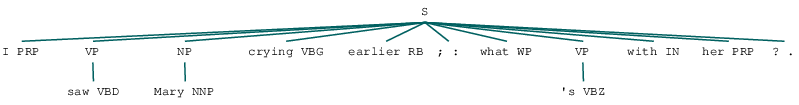

In [75]:
pattern = r"""
    NP: {<DT>?<JJ>*<NN.*>}
    VP: {<VB.?><RB>*<VBG>}
        {<VB.?>?<RB>*<VB[DNPZ]?>}
        
"""
cp = nltk.RegexpParser(pattern)
cs = cp.parse(tagged)
cs

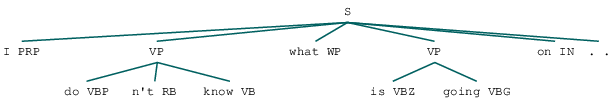

In [76]:
tagged = nltk.pos_tag(nltk.word_tokenize('I don\'t know what is going on.'))
cp.parse(tagged)

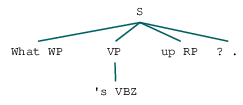

In [77]:
tagged = nltk.pos_tag(nltk.word_tokenize('What\'s up?'))
cp.parse(tagged)

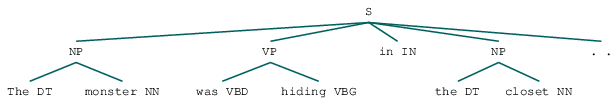

In [78]:
tagged = nltk.pos_tag(nltk.word_tokenize('The monster was hiding in the closet.'))
cp.parse(tagged)

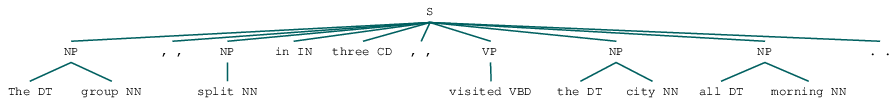

In [79]:
tagged = nltk.pos_tag(nltk.word_tokenize('The group, split in three, visited the city all morning.'))
cp.parse(tagged)

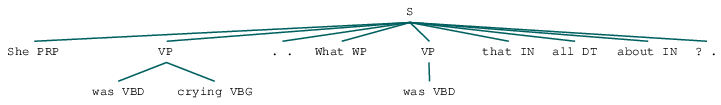

In [53]:
tagged = nltk.pos_tag(nltk.word_tokenize('She was crying. What was that all about?'))
cp.parse(tagged)